<a href="https://colab.research.google.com/github/mars241/Machine-Learning/blob/main/AAM_WCS_4_1_ML-Optimisation_Pipeline_Standardize_your_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

# Exécutez le code ci-dessous 

In [2]:
import pandas as pd
import seaborn as sns

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
# Sélection des colonnes avec "df.isin('col1','col2', ...)"
# "reset_index" supprimera l'index au lieu de le réinsérer dans les colonnes du DataFrame, (drop = True): l'index actuel sera entièrement supprimé et l'index numérique le remplacera.
df_zoom = df_music.loc[df_music.genre.isin(['Country', 'Classical']), ['genre', 'duration_ms', 'speechiness']].reset_index(drop = True) 
# Afficher le dataset
df_zoom 

,genre,duration_ms,speechiness
0,Country,200013,0.0444
1,Country,208187,0.0569
2,Country,123360,0.0960
3,Country,238600,0.0368
4,Country,243000,0.0330
...,...,...,...
17915,Country,179147,0.0322
17916,Country,230400,0.0832
17917,Country,216093,0.0268
17918,Country,179947,0.0909


In [ ]:
# Vérifions les valeurs possibles pour la colonne "genre":
df_zoom['genre'].unique()

array(['Country', 'Classical'], dtype=object)

# Standardization and classification

You now have a dataset with Country and Classical musics, and 2 numerical features : duration and speechiness.
Our goal will be to predict genre from numerical features.

# Normalisation et classification

Vous disposez maintenant d'un jeu de données contenant de la musique classique et de la musique country, et de deux caractéristiques numériques : la durée et l'élocution.
Notre objectif est de prédire le genre à partir des caractéristiques numériques.

## Draw a scatterplot from df_zoom with
- 'duration_ms' on X axis 
- 'speechiness' on Y axis
- 'genre' in hue

## Dessinez un nuage de points à partir de df_zoom avec
- 'durée_ms' sur l'axe X 
- 'speechiness' sur l'axe Y
- 'genre' en teinte

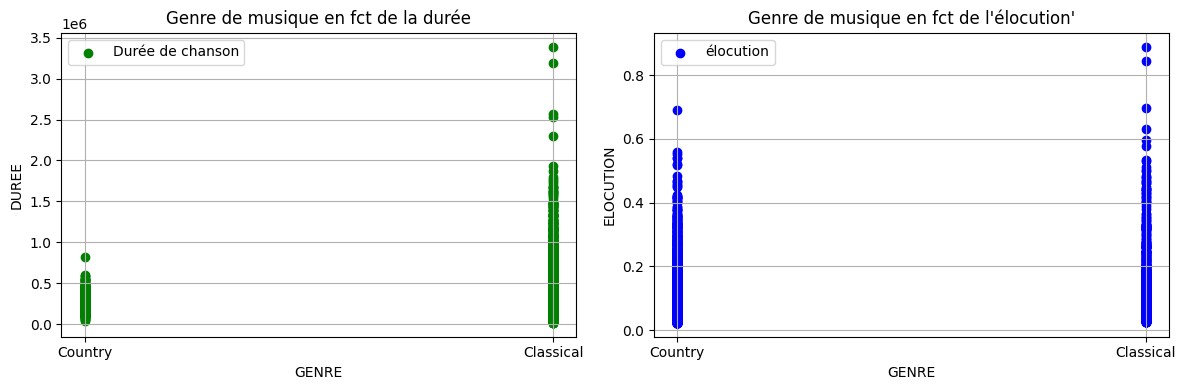

In [7]:
# Your code here :
# votre code ici :

# Nuage de points avec Mathplotlib

# importons la biblio de matplotlib 
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.scatter(df_zoom["genre"], df_zoom["duration_ms"], color ='green', label='Durée de chanson')
ax1.set_title("Genre de musique en fct de la durée")
ax1.set_xlabel('GENRE')
ax1.set_ylabel('DUREE')
ax1.legend()
ax1.grid(True)

ax2.scatter(df_zoom["genre"], df_zoom["speechiness"], color ='blue', label='élocution')
ax2.set_title("Genre de musique en fct de l'élocution'")
ax2.set_xlabel('GENRE')
ax2.set_ylabel('ELOCUTION')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Pas très explicite ici le graphe ! essayons autre chose avec Searbon!

<Axes: xlabel='duration_ms', ylabel='speechiness'>

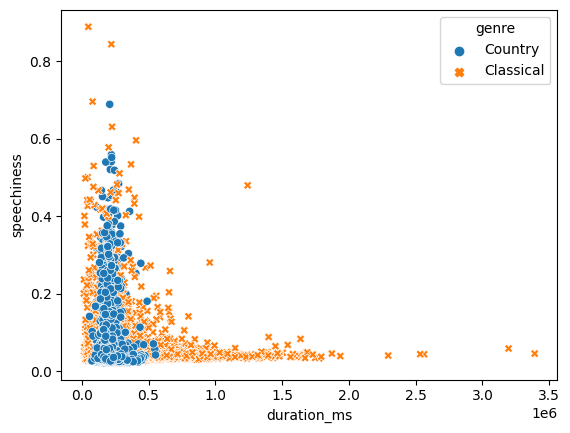

In [5]:
# Autement et mieux avec Searborn
# Nuage de points avec marqueur la variable 'genre'

# importons la biblio de Searborn
import seaborn as sns

sns.scatterplot(data=df_zoom, x='duration_ms', y='speechiness', hue='genre', style="genre") 
# <hue='genre'> fait que 'genre' le représenté par chaque point, et <style="genre"> apporte une différentiation sur le genre car ici on a 2 genres(country&Classical)
# RMQ: les "country"(s) sont en moyenne les moins longues et perçus comme moins intelligibles. 
# Or les "Classical"(s) sont plus longues en durée(normal!) et reste néamoins notés pas très intelligible.

TOPO [Seaborn](https://seaborn.pydata.org/tutorial/relational.html)


## Classification
From df_zoom : 
- define X (`duration_ms` and `speechiness`) 
- define y (`genre`)
- split your datas into train and test datasets, and `random_state = 2`
- perform 3 classification algorithms (Logistic Regression, KNN and Decision Tree)
- score your 3 models with accuracy score on the train dataset and on the test dataset

## Classification
De df_zoom : 
- define X (`duration_ms` et `speechiness`) 
- définir y (`genre`)
- divisez vos données en deux ensembles, train et test, et `random_state = 2`
- exécuter 3 algorithmes de classification (régression logistique, KNN et arbre de décision)
- évaluez vos 3 modèles avec un score de précision sur l'ensemble de données de formation et sur l'ensemble de données de test.

TOPO [Scikit-Learn for supervised_learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

Faire le "Train test split"

In [8]:
# Implémentation du "Train test split"

X = df_zoom[["duration_ms", "speechiness"]]
y = df_zoom['genre']

# Import de la bibliothèque de Sklearn pour le Train
from sklearn.model_selection import train_test_split

# Divisez vos données en deux ensembles, train et test, et random_state = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=2) # => le test se fait sur 20% et le train sur 80%(Paréto)


 Normalisation :

In [9]:
# Import de la bibliothèque de Sklearn pour normaliser
from sklearn.preprocessing import StandardScaler
# Créer et adapter un modèle de mesure
scaler = StandardScaler().fit(X_train)

# Votre modèle de mise à l'échelle peut maintenant transformer vos données
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Votre modèle de mesure peut effectuer une transformation inverse si nécessaire
X_train_new = scaler.inverse_transform(X_train_scaled)
X_train_new == X_train

,duration_ms,speechiness
5774,True,True
290,True,True
2626,True,True
14181,True,True
7784,True,True
...,...,...
14696,True,True
1099,True,True
11798,True,True
6637,True,True


In [ ]:
# voir la tête du "train" obtenue par la mêthode inversé
X_train_new

array([[6.67973e+05, 4.19000e-02],
       [2.42293e+05, 3.31000e-02],
       [2.27027e+05, 3.19000e-02],
       ...,
       [2.78467e+05, 5.08000e-02],
       [8.02800e+04, 3.75000e-02],
       [2.47293e+05, 2.60000e-02]])

In [12]:
# Vectorisation des valeurs Country'& 'Classical de la colonne 'genre' :
# On peut transformer par exmple la variable "genre" en valeurs numériques(binaire; 0/1: Country /Classical) par la méthode de factorisation:
df_zoom_fact_sex  = df_zoom['genre'].factorize()[0]
df_zoom_fact_sex

array([0, 0, 0, ..., 0, 0, 0])

Classification :

Exécuter 3 algorithmes de classification (régression logistique, KNN et arbre de décision).

Noter vos 3 modèles avec le score de précision sur l'ensemble de données d'entraînement et sur l'ensemble de données de test.

In [14]:
# importation de la bibliothèque pour la régression logistique (RegLog)
from sklearn.linear_model import LogisticRegression

# importation de la bibliothèque pour le KNN 
from sklearn.neighbors import KNeighborsClassifier

# importation de la bibliothèque pour l' arbre de décision
from sklearn.tree import DecisionTreeClassifier

# importation de(s) métrique(s) des ML(S)
from sklearn.metrics import accuracy_score

# implémentation du "train test split" pour les 3 ML succintement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Adapter le modèle de mesure pour la RegLog
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Adapter le modèle de mesure du KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Adapter le modèle de mesure du Decision Tree 
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

# Les(s) Scores des modèles avec le score de précision sur les ensembles de données d'entrainement et de test
print("Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble d'entraînement est:", accuracy_score(y_train, logreg.predict(X_train)))
print("Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble d'entraînement est:", accuracy_score(y_train, knn.predict(X_train)))
print("Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble d'entraînement est:", accuracy_score(y_train, DTC.predict(X_train)))


print("Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble de test est :", accuracy_score(y_test, logreg.predict(X_test)))
print("Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble de test est :", accuracy_score(y_test, knn.predict(X_test)))
print("Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble de test est :", accuracy_score(y_test, DTC.predict(X_test)))

# Les SCORES semblent s'approcher des valeurs attendues!

Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble d'entraînement est: 0.5224808673469388
Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble d'entraînement est: 0.7976721938775511
Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble d'entraînement est: 0.9996811224489796
Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble de test est : 0.5026041666666666
Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble de test est : 0.70703125
Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble de test est : 0.7193080357142857



You have to find these accuracy scores for test set :
- Logistic regression : 0.50982
- KNN : 0.71295
- Decision tree : 0.73728

It seems Decision tree is better, but did you look at the overfitting ?


Vous devez trouver ces scores de précision pour l'ensemble de test :
- Régression logistique : 0.50982
- KNN : 0.71295
- Arbre de décision : 0.73728

Il semble que l'arbre de décision soit meilleur, mais avez-vous regardé l'overfitting ?

TOPO: [**L’overfitting**](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/ml_a_tree_overfitting.html) ou **surapprentissage** apparaît lorsque les prédictions sur de nouvelles données sont nettement moins bonnes que celles obtenus sur la base d’apprentissage. Les forêts aléatoires sont moins sujettes à l’overfitting que les arbres de décisions qui les composent.




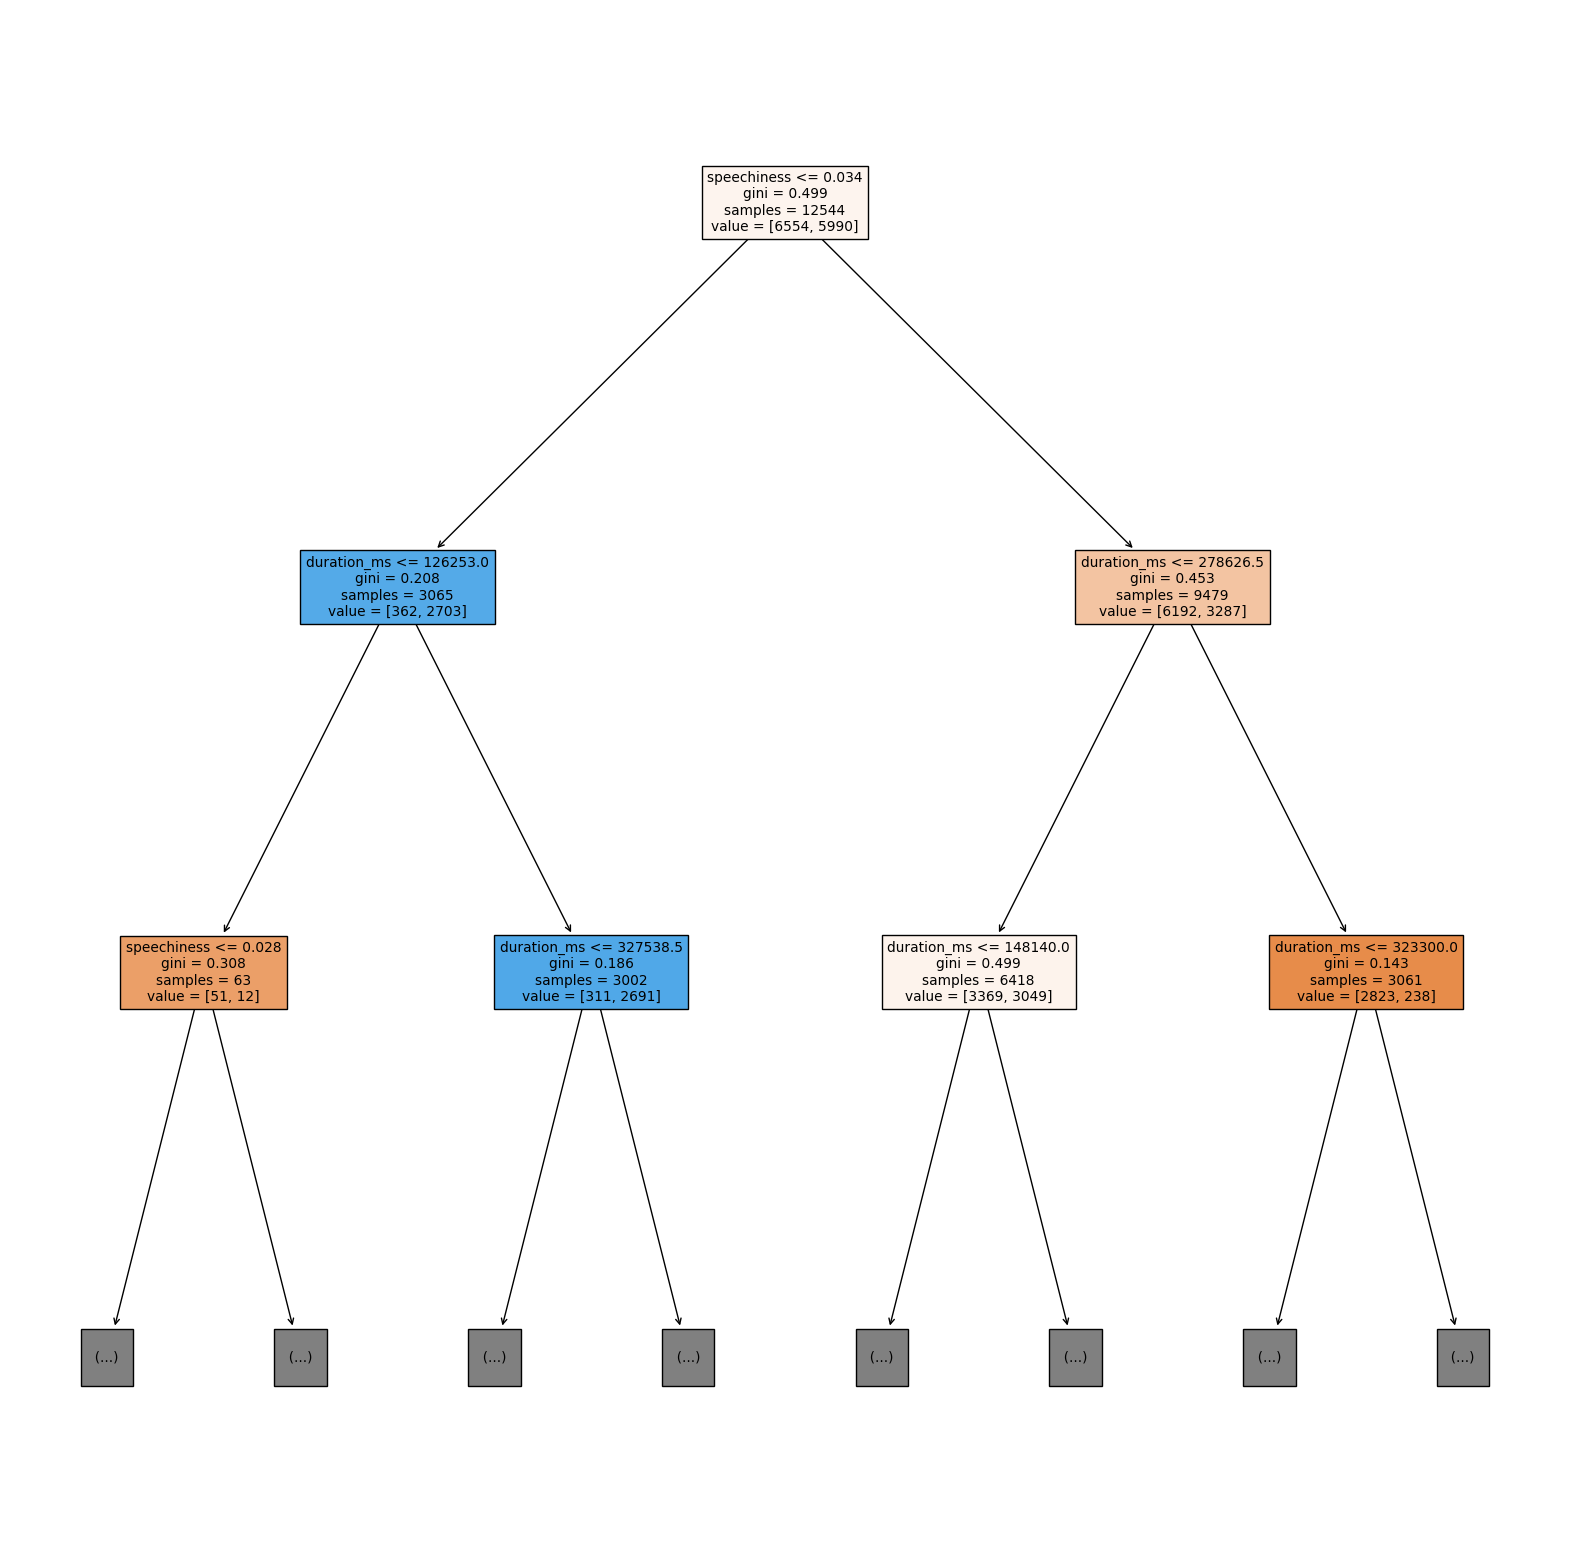

In [16]:
# ETUDE OVERFITTING (max_depth = 2)

# Pour les arbres de décision (Decision tree) On regarde l’influence de paramêtres sur la sortie du modèle résultant de son apprentissage.
# Régarder "l'overfittting" revient à  paramètrer le 'max_depth'qui est une fonction en escalier, La profondeur détermine le nombre de feuilles,
# c’est-à-dire le nombre de valeurs possibles.

# import des bibliothèques:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# Adapter le modèle de mesure du 'Decision Tree' 
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

# Tracer des résultats
# import des bibliothèques pour le tracer:
from sklearn.tree import plot_tree

# Le tracer de l'arbre de décision
plt.figure(figsize = (20,20))
plot_tree( DTC,
          filled = True, 
          feature_names=X_train.columns, # Utiliser les valeurs du 'X_train' de la colonne 'genre' comme noms d'entités
          max_depth = 2 ) # une max_depth de seulement 2
plt.show()

# Du coup, l'arbre de décision s'appuie bien par "speechiness"/"duration_ms" sur les 2 variables citées ci-dessus:

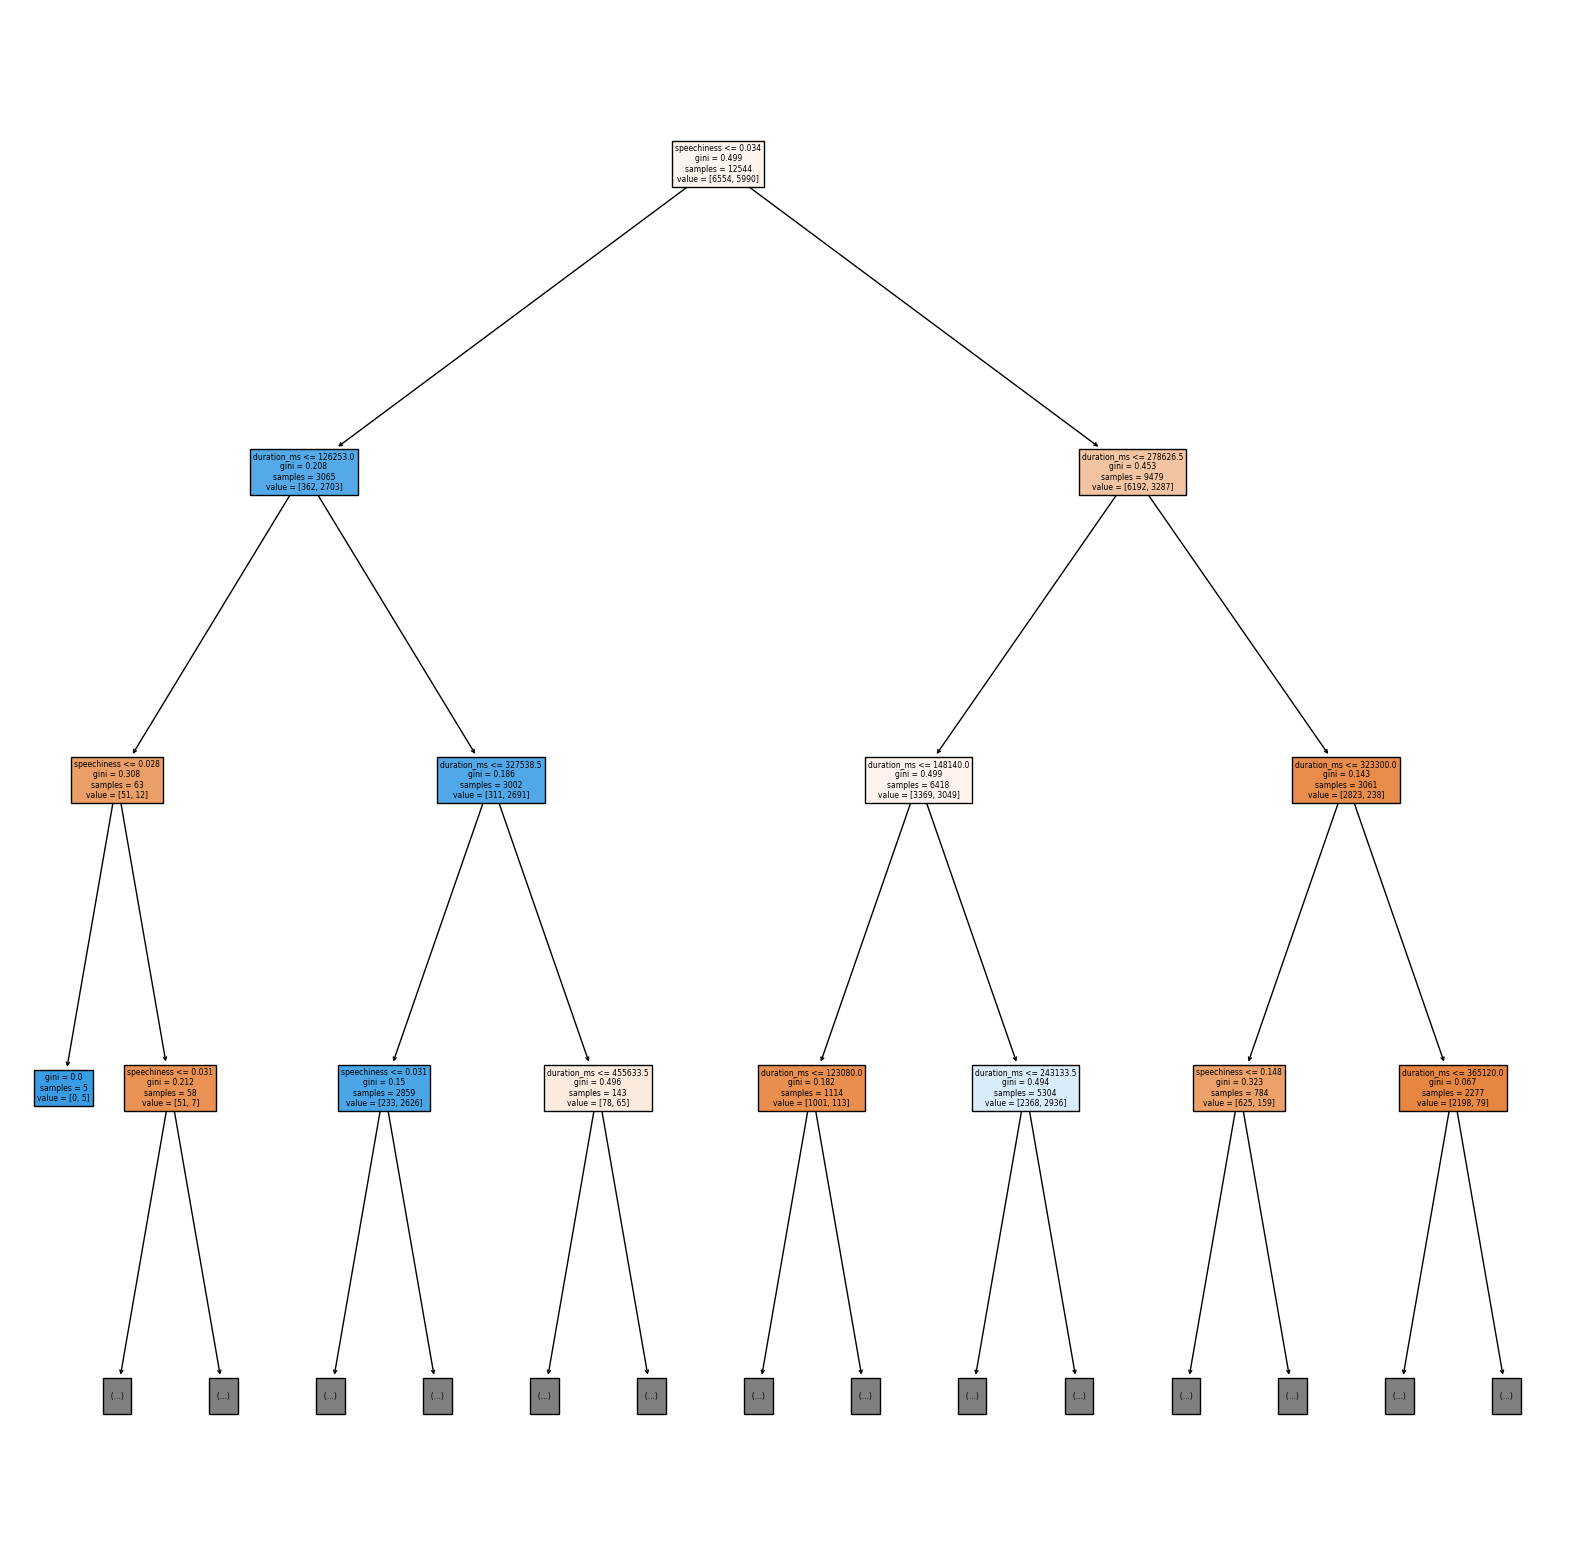

In [17]:
# ...Suite ETUDE OVERFITTING (max_depth = 3)

# Tracer des résultats
# import des bibliothèques pour le tracer:
from sklearn.tree import plot_tree

# Le tracer de l'arbre de décision
plt.figure(figsize = (20,20))
plot_tree( DTC,
          filled = True, 
          feature_names=X_train.columns, # Utiliser les valeurs du 'X_train' de la colonne 'genre' comme noms d'entités
          max_depth = 3 ) # une max_depth de 3 cette fois-ci
plt.show()

## Standardization

- Fit your scaler model on X_train
- Transform X_train and X_test  with your scaler model into  X_train_scaled and X_test_scaled
- perform and score the same 3 classification algorithms, but with X_train_scaled and X_test_scaled

## Normalisation

- Ajustez votre modèle de mesure sur X_train
- Transformer X_train et X_test avec votre modèle d'échelle en X_train_scaled et X_test_scaled
- exécuter et noter les 3 mêmes algorithmes de classification, mais avec X_train_scaled et X_test_scaled

In [18]:
# Your code here :
# Votre code ici :

# Normalisation

# Import de la bibliothèque de Sklearn pour normaliser
from sklearn.preprocessing import StandardScaler

# Créer et ajustez votre modèle de mesure sur X_train
scaler = StandardScaler() # <=>
scaler.fit(X_train)       # En 1 seule fois avec la sythaxe: < scaler = StandardScaler().fit(X_train)>

# Transformer vos données : Transformer X_train et X_test avec votre modèle d'échelle en X_train_scaled et X_test_scaled
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# importation de la bibliothèque pour la régression logistique (RegLog)
from sklearn.linear_model import LogisticRegression

# importation de la bibliothèque pour le KNN 
from sklearn.neighbors import KNeighborsClassifier

# importation de la bibliothèque pour l' arbre de décision
from sklearn.tree import DecisionTreeClassifier

# importation de(s) métrique(s) des ML(S)
from sklearn.metrics import accuracy_score

# Adapter le modèle de mesure pour la RegLog avec le "scaled"
logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train)

# Adapter le modèle de mesure du KNN avec le "scaled"
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)

# Adapter le modèle de mesure du Decision Tree avec le "scaled"
DTC_scaled = DecisionTreeClassifier()
DTC_scaled.fit(X_train_scaled, y_train)

# Les(s) Scores des modèles avec le score de précision sur les ensembles de données d'entrainement et de test
print("Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble d'entraînement est:", accuracy_score(y_train, logreg_scaled.predict(X_train_scaled)))
print("Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble d'entraînement est:", accuracy_score(y_train, knn_scaled.predict(X_train_scaled)))
print("Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble d'entraînement est:", accuracy_score(y_train, DTC_scaled.predict(X_train_scaled)))


print("Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble de test est :", accuracy_score(y_test, logreg_scaled.predict(X_test_scaled)))
print("Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble de test est :", accuracy_score(y_test, knn_scaled.predict(X_test_scaled)))
print("Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble de test est :", accuracy_score(y_test, DTC_scaled.predict(X_test_scaled)))


Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble d'entraînement est: 0.6567283163265306
Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble d'entraînement est: 0.8387276785714286
Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble d'entraînement est: 0.9996811224489796
Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble de test est : 0.6551339285714286
Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble de test est : 0.7613467261904762
Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble de test est : 0.7234002976190477


In [19]:
# Prolongation/ autre approche:
# Normalisation *inversée* ou Transformation *inverse* afin de comparer les SCORES des deux

# Import de la bibliothèque de Sklearn pour normaliser de manière *inverse* aussi:
from sklearn.preprocessing import StandardScaler

# Transformation *inverse* de vos données : Votre modèle de mesure peut effectuer une transformation *inverse*
# Transformer en inversement X_train_scaled et X_test_scaled avec votre modèle d'échelle en *X_train_scaled_inv* et *X_test_scaled_inv*
X_train_scaled_inv = scaler.inverse_transform(X_train_scaled) # transformation *inverse* avec synthaxe < scaler. inverse_transform() >
X_test_scaled_inv = scaler.inverse_transform(X_test_scaled)


# importation de la bibliothèque pour la régression logistique (RegLog)
from sklearn.linear_model import LogisticRegression

# importation de la bibliothèque pour le KNN 
from sklearn.neighbors import KNeighborsClassifier

# importation de la bibliothèque pour l' arbre de décision
from sklearn.tree import DecisionTreeClassifier

# importation de(s) métrique(s) des ML(S)
from sklearn.metrics import accuracy_score

# Adapter le modèle de mesure pour la RegLog avec le "scaled *inversé*"
logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled_inv, y_train)

# Adapter le modèle de mesure du KNN avec le "scaled *inversé*"
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled_inv, y_train)

# Adapter le modèle de mesure du Decision Tree avec le "scaled *inversé*"
DTC_scaled = DecisionTreeClassifier()
DTC_scaled.fit(X_train_scaled_inv, y_train)

# Les(s) Scores des modèles avec le score de précision sur les ensembles de données d'entrainement et de test
print("Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble d'entraînement est:", accuracy_score(y_train, logreg_scaled.predict(X_train_scaled_inv)))
print("Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble d'entraînement est:", accuracy_score(y_train, knn_scaled.predict(X_train_scaled_inv)))
print("Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble d'entraînement est:", accuracy_score(y_train, DTC_scaled.predict(X_train_scaled_inv)))


print("Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble de test est :", accuracy_score(y_test, logreg_scaled.predict(X_test_scaled_inv)))
print("Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble de test est :", accuracy_score(y_test, knn_scaled.predict(X_test_scaled_inv)))
print("Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble de test est :", accuracy_score(y_test, DTC_scaled.predict(X_test_scaled_inv)))

# les SCORES de précision de la Normalisation et de son inversé dans les 3 ML(s) de Classification sont proportionnels, 
# En effet, l'arbre de décision obtient un meilleur score dans la Normalisation inversée, cette dernière peut être retenue!

Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble d'entraînement est: 0.5224808673469388
Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble d'entraînement est: 0.7976721938775511
Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble d'entraînement est: 0.9996811224489796
Le Score d'exactitude (Accuracy) de la *RegLog* sur l'ensemble de test est : 0.5026041666666666
Le Score d'exactitude (Accuracy) du *KNN* sur l'ensemble de test est : 0.70703125
Le Score d'exactitude (Accuracy) de la *Decision Tree* sur l'ensemble de test est : 0.7230282738095238


# Conclusion
- Decision tree is insensitive to Standardization.
- Logistic regression and KNN have better result after Standardization.


We can remember that standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.

# Conclusion
- L'arbre de décision est insensible à la standardisation.
- La régression logistique et le KNN ont de meilleurs résultats après la normalisation.


On peut rappeler que la normalisation est toujours bonne en prétraitement, avant les classifications et régressions par apprentissage automatique. Au pire, elle ne change rien. Au mieux, elle améliore les résultats.